In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [14]:
cancer_data_path = "/Users/nathanjohnsonp/Downloads/cancer.csv"

cancer_data =pd.read_csv(cancer_data_path)



In [15]:
cancer_data

,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,160.2,10429,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,156.0,1093,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,134.7,12813,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,168.2,6516,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,132.4,59503,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
445,2005,VA,190.0,"13,877",/nchs/pressroom/states/virginia/virginia.htm
446,2005,WA,181.0,"11,048",/nchs/pressroom/states/washington/washington.htm
447,2005,WV,207.4,"4,617",/nchs/pressroom/states/westvirginia/westvirgin...
448,2005,WI,182.8,"10,943",/nchs/pressroom/states/wisconsin/wisconsin.htm


In [16]:
#clean the data here? get rid of the urls
to_drop = ["URL"]
cancer_data.drop(to_drop, inplace=True, axis=1)
cancer_data

,YEAR,STATE,RATE,DEATHS
0,2021,AL,160.2,10429
1,2021,AK,156.0,1093
2,2021,AZ,134.7,12813
3,2021,AR,168.2,6516
4,2021,CA,132.4,59503
...,...,...,...,...
445,2005,VA,190.0,"13,877"
446,2005,WA,181.0,"11,048"
447,2005,WV,207.4,"4,617"
448,2005,WI,182.8,"10,943"


In [17]:
#the average cancer rate over all by year an state

cancer_byyear =cancer_data["YEAR"].mean()

cancer_byyear


2016.111111111111

In [18]:
cancer_df = pd.DataFrame(cancer_data)

cancer_df



,YEAR,STATE,RATE,DEATHS
0,2021,AL,160.2,10429
1,2021,AK,156.0,1093
2,2021,AZ,134.7,12813
3,2021,AR,168.2,6516
4,2021,CA,132.4,59503
...,...,...,...,...
445,2005,VA,190.0,"13,877"
446,2005,WA,181.0,"11,048"
447,2005,WV,207.4,"4,617"
448,2005,WI,182.8,"10,943"


In [19]:
for x in cancer_df.index: 
  if cancer_df.loc[x, "YEAR"] < 2021:
    cancer_df.drop(x, inplace = True)
    
    cancer_df

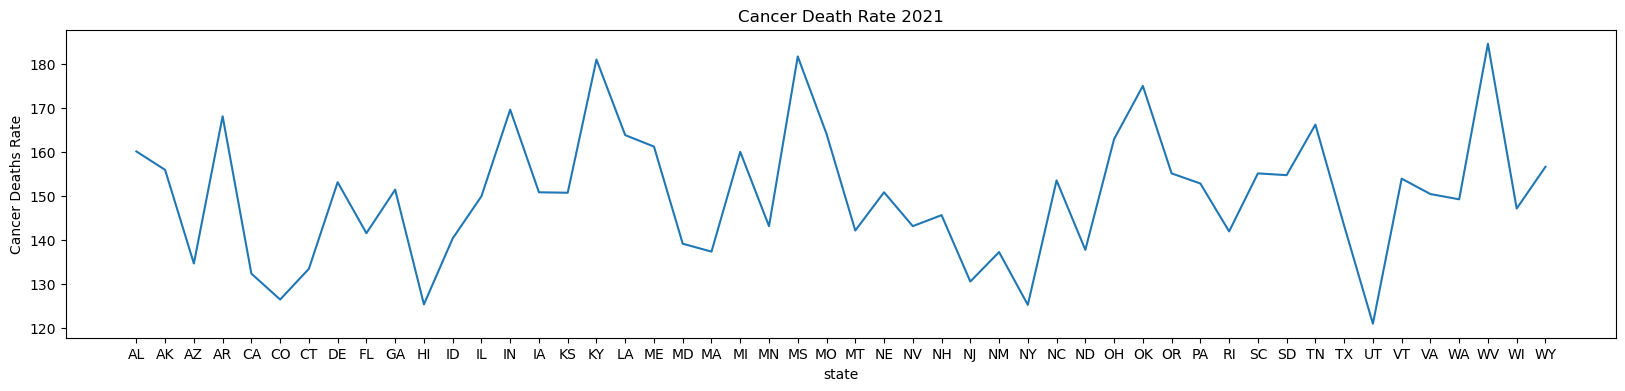

In [20]:
plt.figure(figsize=(20,4))
plt.plot(cancer_df['STATE'], cancer_df['RATE'])
plt.xlabel('state')
plt.ylabel('Cancer Deaths Rate')
plt.title('Cancer Death Rate 2021')
plt.show()
#cancer_df.plot(x="DEATHS", y="STATE", kind="bar") 

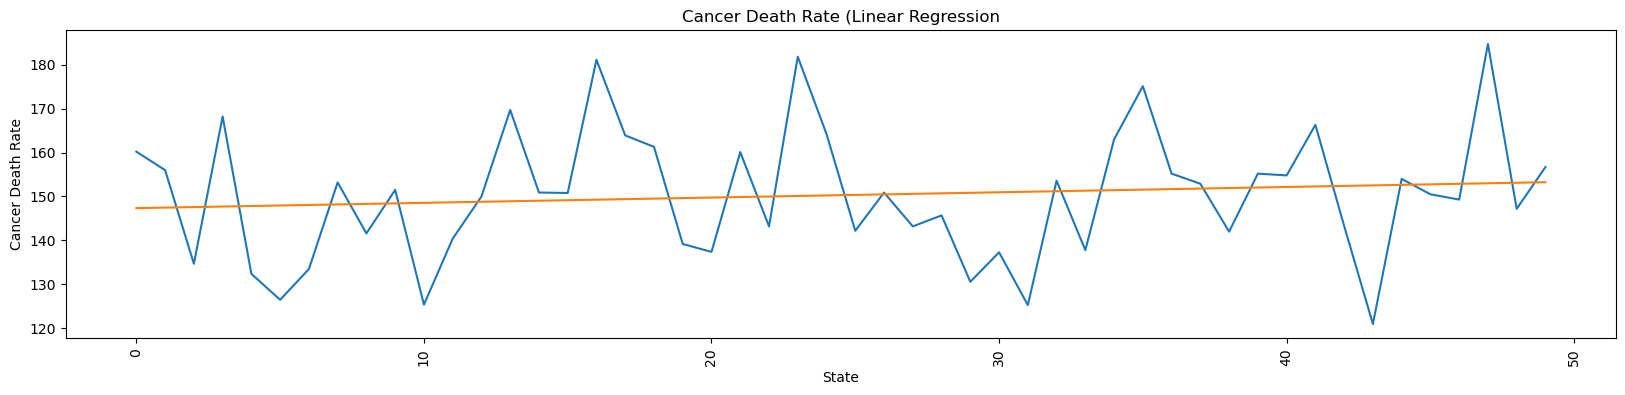

Slope: 0.12030732292917175
Intercept: 147.3524705882353
R-value: 0.11846279834150977
P-value: 0.41257954529900553


In [22]:
x = np.arange(len(cancer_df['STATE']))  # Use numerical values for x-axis instead of state names
y = cancer_df['RATE']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.figure(figsize=(20,4))
plt.plot(x, y)
plt.plot(x, regression_line)
plt.xlabel('State')
plt.ylabel('Cancer Death Rate')
plt.title('Cancer Death Rate (Linear Regression)')
plt.xticks(rotation=90)
plt.show()
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")